### bagging 

In [1]:
import numpy as np
import pandas as pd
df =pd.read_csv('Iris.csv')

In [2]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [3]:
df['Species'] = encoder.fit_transform(df['Species'])

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [5]:
df = df[df['Species'] != 0 ][['SepalWidthCm','PetalLengthCm','Species']]

In [6]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [7]:
df.sample(5)

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
88,3.0,4.1,1
67,2.7,4.1,1
149,3.0,5.1,2
59,2.7,3.9,1


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

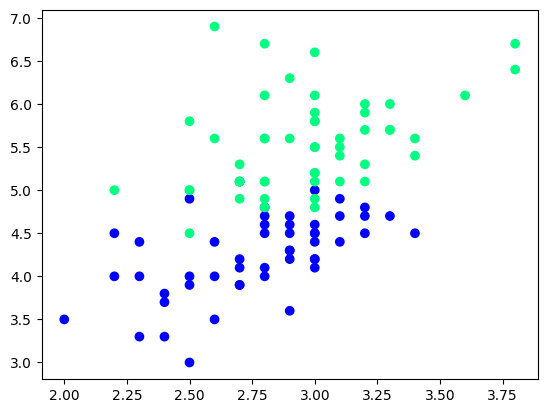

In [9]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c =df['Species'],cmap ='winter')

In [10]:
df =df.sample(100)
df_train = df.iloc[:60,:].sample(10) # taking 10 rows from first 60 rows 
df_val =df.iloc[60:80,:].sample(5) # taking 5 rows from 60 to 80 rows 
df_test = df.iloc[80:,:].sample(5)# from 80 to next taking 5

In [11]:
df_train

,SepalWidthCm,PetalLengthCm,Species
91,3.0,4.6,1
134,2.6,5.6,2
67,2.7,4.1,1
142,2.7,5.1,2
58,2.9,4.6,1
89,2.5,4.0,1
128,2.8,5.6,2
130,2.8,6.1,2
129,3.0,5.8,2
113,2.5,5.0,2


In [12]:
df_test

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
106,2.5,4.5,2
116,3.0,5.5,2
54,2.8,4.6,1
59,2.7,3.9,1


In [13]:
X_test = df_val.iloc[:,0:2].values

In [14]:
X_test

array([[3. , 4.5],
       [3.1, 4.4],
       [3. , 5.8],
       [3. , 4.8],
       [2.7, 4.9]])

In [15]:
y_test = df_val.iloc[:,-1].values

In [16]:
y_test

array([1, 1, 2, 2, 2])

### Case -1 Bagging 

In [17]:
# data for tree one 
df_bag = df_train.sample(8,replace= True) # replce true mean a single row can be came multiple time 
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [19]:
x

,SepalWidthCm,PetalLengthCm
50,3.2,4.7
109,3.6,6.1
105,3.0,6.6
123,2.7,4.9
142,2.7,5.1
77,3.0,5.0
105,3.0,6.6
142,2.7,5.1


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [19]:
df_bag1 = DecisionTreeClassifier()
df_bag2 = DecisionTreeClassifier()
df_bag3 = DecisionTreeClassifier()
df_bag4 = DecisionTreeClassifier()

In [20]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf =clf ,legend = 2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred),'%')

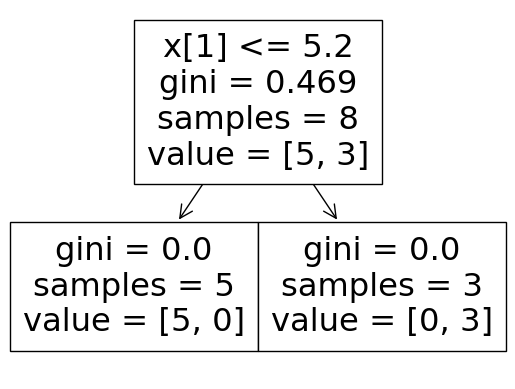

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6 %


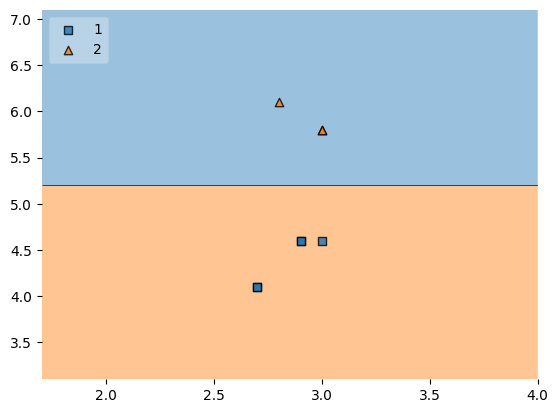

In [21]:
evaluate(df_bag1,x,y)

     SepalWidthCm  PetalLengthCm  Species
67            2.7            4.1        1
67            2.7            4.1        1
91            3.0            4.6        1
67            2.7            4.1        1
113           2.5            5.0        2
128           2.8            5.6        2
129           3.0            5.8        2
129           3.0            5.8        2


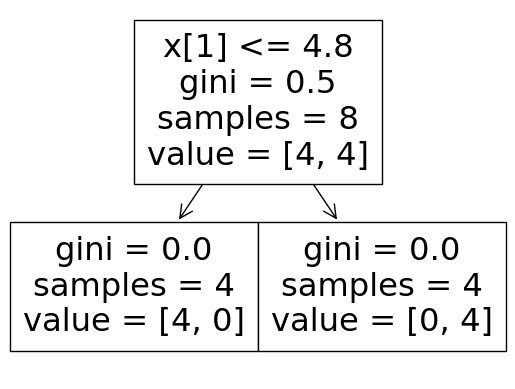

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0 %


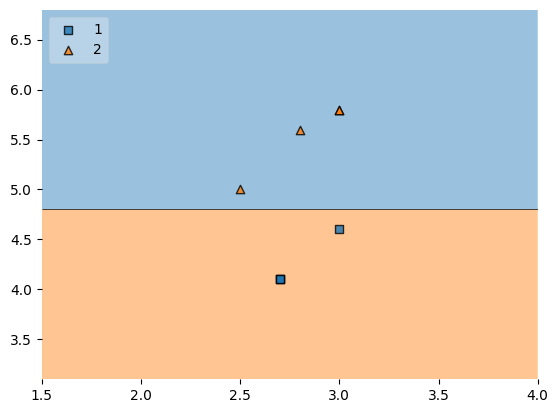

In [22]:
# data for tree one 
df_bag = df_train.sample(8,replace= True) # replce true mean a single row can be came multiple time 
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
print(df_bag)
evaluate(df_bag2,x,y)


     SepalWidthCm  PetalLengthCm  Species
130           2.8            6.1        2
67            2.7            4.1        1
128           2.8            5.6        2
142           2.7            5.1        2
130           2.8            6.1        2
130           2.8            6.1        2
142           2.7            5.1        2
89            2.5            4.0        1


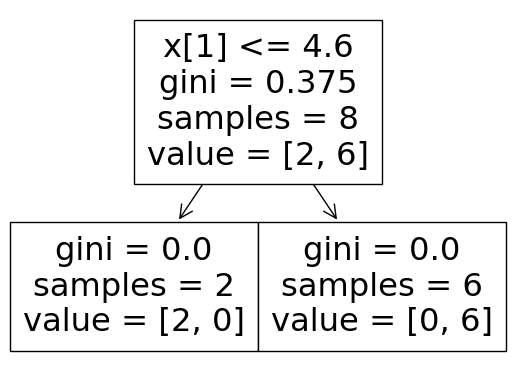

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0 %


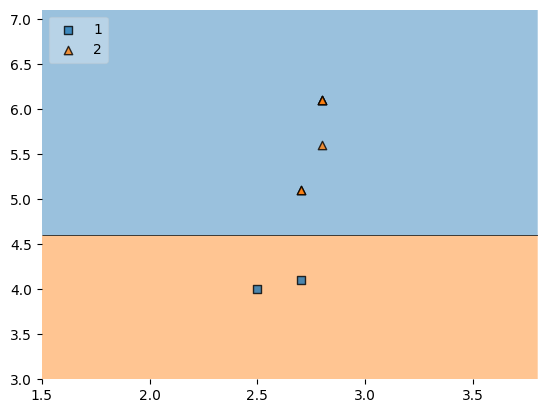

In [23]:
# data for tree one 
df_bag = df_train.sample(8,replace= True) # replce true mean a single row can be came multiple time 
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
print(df_bag)
evaluate(df_bag3,x,y)

     SepalWidthCm  PetalLengthCm  Species
128           2.8            5.6        2
128           2.8            5.6        2
142           2.7            5.1        2
67            2.7            4.1        1
89            2.5            4.0        1
58            2.9            4.6        1
142           2.7            5.1        2
130           2.8            6.1        2


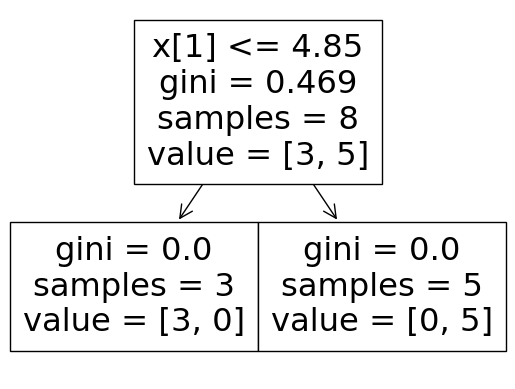

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8 %


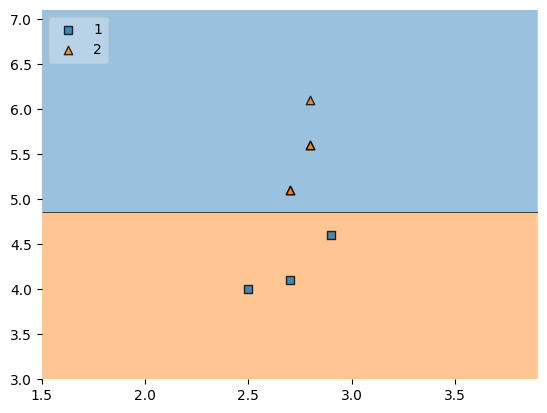

In [24]:
# data for tree one 
df_bag = df_train.sample(8,replace= True) # replce true mean a single row can be came multiple time 
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
print(df_bag)
evaluate(df_bag4,x,y)

### predict 

In [25]:
df_test

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
106,2.5,4.5,2
116,3.0,5.5,2
54,2.8,4.6,1
59,2.7,3.9,1


In [26]:
print('predictor 1',df_bag1.predict(np.array([2.7,5.3]).reshape(1,2)))
print('predictor 2',df_bag2.predict(np.array([2.7,5.3]).reshape(1,2)))
print('predictor 3',df_bag3.predict(np.array([2.7,5.3]).reshape(1,2)))

predictor 1 [2]
predictor 2 [2]
predictor 3 [2]


/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [27]:
print('predictor 1',df_bag1.predict(np.array([3.0,6.1]).reshape(1,2)))
print('predictor 2',df_bag2.predict(np.array([3.0,6.1]).reshape(1,2)))
print('predictor 3',df_bag3.predict(np.array([3.0,6.1]).reshape(1,2)))

predictor 1 [2]
predictor 2 [2]
predictor 3 [2]


/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [28]:
print('predictor 1',df_bag1.predict(np.array([2.8,4.1]).reshape(1,2)))
print('predictor 2',df_bag2.predict(np.array([2.8,4.1]).reshape(1,2)))
print('predictor 3',df_bag3.predict(np.array([2.8,4.1]).reshape(1,2)))

predictor 1 [1]
predictor 2 [1]
predictor 3 [1]


/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### TYPE OF BAGGING 
* it depend on samplling
  1. pasitng
     * row sampling without reapting 
  2. random subspace
 
     * column sampling (with or without repeating )
  3. random

In [29]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 


In [30]:
X,y  = make_classification(n_samples=10000,n_features= 10 ,n_informative=3)
X_train ,X_test,y_train ,y_test = train_test_split(X,y,test_size =0.2,random_state= 42)

In [31]:
dt =DecisionTreeClassifier(random_state= 42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print('Decison tree accuracy ',accuracy_score(y_test,y_pred))


Decison tree accuracy  0.918


### Bagging 

In [33]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 0.25,
    bootstrap= True,
    random_state =42,
    n_jobs= -1,
    verbose= 1,
)

In [34]:
bag.fit(X_train,y_train)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    3.4s remaining:   24.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.9s finished


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, n_jobs=-1, random_state=42, verbose=1)

In [35]:
y_pred = bag.predict(X_test)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.3s finished


In [36]:
accuracy_score(y_test,y_pred)

0.9475

In [37]:
bag.estimators_samples_[0].shape

(2000,)

### Bagging using SVM

In [38]:
bag_svc = BaggingClassifier(
    estimator = SVC(),
    n_estimators= 500,
    max_samples= 0.25,
    bootstrap= True,
    random_state =42,
    n_jobs= -1,
    verbose= 1
)

In [39]:
bag_svc.fit(X_train,y_train)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    3.7s remaining:   25.6s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    4.3s finished


BaggingClassifier(estimator=SVC(), max_samples=0.25, n_estimators=500,
                  n_jobs=-1, random_state=42, verbose=1)

In [40]:
y_pred = bag_svc.predict(X_test)
print('bagging using SVM',accuracy_score(y_test,y_pred))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    3.3s remaining:   23.2s


bagging using SVM 0.9375


[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    3.9s finished


### pasting 

In [41]:
bag1 = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 0.25,
    bootstrap= False, # no replacement allowed 
    random_state =42, # 
    n_jobs =-1 , # use all cores in cpu
    verbose= 1 # it will show the infomation in the training time
)

In [42]:
bag1.fit(X_train,y_train)
y_pred = bag1.predict(X_test)
print('bagging using SVM',accuracy_score(y_test,y_pred))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    1.8s remaining:   12.6s


bagging using SVM 0.948


[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.2s finished


### random subspace  (only  column sampling )


In [43]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 1.0,
    bootstrap= False,
    bootstrap_features= True,# Sample features without replacement
    random_state =42,
    n_jobs= -1,
    verbose= 1
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print('bagging using SVM',accuracy_score(y_test,y_pred))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:   11.7s remaining:  1.4min
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   13.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.1s remaining:    0.5s


bagging using SVM 0.9435


[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.4s finished


In [55]:
bag.estimators_samples_[0].shape

(8000,)

### random patches 

In [44]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 0.25,
    bootstrap= True,
    max_features= 0.5,
    bootstrap_features= True,# Sample features without replacement
    random_state =42,
    n_jobs =-1 , # use all cores in cpu
    verbose= 1 
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print('bagging using SVM',accuracy_score(y_test,y_pred))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    1.0s remaining:    7.2s


bagging using SVM 0.94


[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.2s finished


### OOB SCORE  (out of bag )sample
* in the training time anout 63 percentge data is used for the training  and remaning 37 is not taken by the bagging that data is known as the OOB score
* 

In [45]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 1.0,
    bootstrap= True,
    oob_score= True,
    random_state =42
)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print('bagging using decisoin',accuracy_score(y_test,y_pred))

bagging using SVM 0.943


In [46]:
bag.oob_score_

0.94125

### bagging socore tips
* bagging generarlly gives better results than pasting
* good results around the 25 to 50 % row sampling
* random patches and subsapces should be used while dealing wiht high dimensions data
* to find the correct hyperparameters values we can gridSearch randomSearchCV

### Applying GridSearchCV


In [47]:
parameters ={
    'n_estimators' :[50,100,500],
    'max_samples':[0.1,0.4,0.7,1.0],
    'bootstrap':[True,False],
    'max_features':[0.1,0,4,0,7,1.0]
}

In [48]:
from sklearn.model_selection import GridSearchCV
search =GridSearchCV(BaggingClassifier(),parameters,cv =5,n_jobs= -1 ,verbose= 1)

In [49]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/home/anubhav/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/home/anubhav/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/anubha

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0, 4, 0, 7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]},
             verbose=1)

In [52]:
search.best_params_

{'bootstrap': False,
 'max_features': 1.0,
 'max_samples': 0.4,
 'n_estimators': 100}

In [53]:
search.best_score_

0.9411249999999999

### bagging regressor 


In [54]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris, Y_iris = iris.data, iris.target
print('Dataset features names : '+ str(iris.feature_names))
print('Dataset features size : '+ str(iris.data.shape))
print('Dataset target size : '+ str(iris.target.shape))

Dataset features names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset features size : (150, 4)
Dataset target size : (150,)


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_iris, Y_iris , train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sets Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sets Sizes :  (120, 4) (30, 4) (120,) (30,)


In [58]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [59]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [60]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [61]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.938638309162935
R^2 score for DT 0.9162011173184358
R^2 score for KNN 0.9513966480446927


In [62]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [63]:
Y_preds = bag_regressor.predict(X_test)

In [64]:
print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.991
Test Coefficient of R^2 : 0.962


In [67]:
%%time

n_samples = iris.data.shape[0]
n_features = iris.data.shape[1]

params = {'estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.973
Test R^2 Score : 0.960
Best R^2 Score Through Grid Search : 0.952
Best Parameters :  {'bootstrap': True, 'bootstrap_features': False, 'estimator': KNeighborsRegressor(), 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
CPU times: user 1.05 s, sys: 390 ms, total: 1.44 s
Wall time: 11.8 s
